In [ ]:
library("tidyverse")
library("writexl")
library("readxl")
source("./code/plots.R")

# Figure 2

## code

In [ ]:
disease <- read_tsv("./results/MRDN_nodes_category.txt")
fullname <- c("Bacterial Infections and Mycoses", 
              "Neoplasms", 
              "Cardiovascular Diseases", 
              "Digestive System Diseases", 
              "Hemic and Lymphatic Diseases", 
              "Immune System Diseases", 
              "Nutritional and Metabolic Diseases", 
              "Musculoskeletal Diseases", 
              "Nervous System Diseases", 
              "Parasitic Diseases", 
              "Respiratory Tract Diseases", 
              "Skin and Connective Tissue Diseases", 
              "Urogenital Diseases and Pregnancy Complications", 
              "Virus Diseases", 
              "Others"
             )
disease["Category"] <- factor(disease$Category, ordered=TRUE, levels=fullname)

In [ ]:
f2a <- ggplot(disease, aes(Category, fill=Category)) + 
    geom_bar(stat="count") + 
    scale_fill_manual(values=c("#ff6600", 
                               "#ff00cc", 
                               "#ffcc00", 
                               "#ccff00", 
                               "#ff3333", 
                               "#00ff00", 
                               "#00ff66", 
                               "#00ffcc", 
                               "#00ccff", 
                               "#0000ff", 
                               "#6600ff", 
                               "#cc00ff", 
                               "#ff0066", 
                               "#ff0000", 
                               "#aaaaaa"
                              )) + 
    labs(x="Disease Classes", y="Count") + 
    scale_y_continuous(breaks=seq(0, 120, 30), limits=c(0,120)) + 
    theme(panel.background = element_blank(), 
          panel.grid = element_blank(), 
          axis.line = element_line(color="gray30"), 
          axis.ticks = element_line(color="gray30"), 
          axis.text = element_text(color="gray30"), 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(),
          legend.title = element_blank()
         )

In [ ]:
exp_data <- read_tsv("./results/HMDD_tissue.txt")
exp_data <- exp_data %>%
    group_by(`pri-miRNA`, disease) %>%
    summarize(regulation=sum(regulation)) %>%
    filter(regulation != 0)

In [5]:
mir <- exp_data %>%
    group_by(`pri-miRNA`) %>%
    summarize(count=n()) %>%
    arrange(desc(count)) %>%
    head(n=10) %>%
    mutate(group="mir", name=`pri-miRNA`)
disease <- exp_data %>%
    group_by(disease) %>%
    summarize(count=n()) %>%
    arrange(desc(count)) %>%
    head(n=10) %>%
    mutate(group="disease", name=disease)
cnt <- bind_rows(mir, disease)
cnt["name"] <- factor(cnt$name, ordered=TRUE, levels=cnt$name)

In [ ]:
f2bc <- ggplot(cnt ,#%>% filter(group=="mir"), 
               aes(x=name, y=count, fill=group)) + 
    geom_col() + 
    scale_fill_manual(values = c("steelblue", "tomato")) + 
    guides(fill="none") + 
    #scale_y_continuous(limits=c(0,100)) + 
    theme(panel.background = element_blank(), plot.margin = margin(0,0,13,15, "mm"),
          panel.grid = element_blank(), 
          axis.line = element_line(color="gray30"), 
          axis.ticks = element_line(color="gray30"), 
          axis.text = element_text(color="gray30"), 
          axis.text.x = element_text(hjust=1, angle=45), 
         ) + facet_wrap(. ~ group, scales="free")

## plot

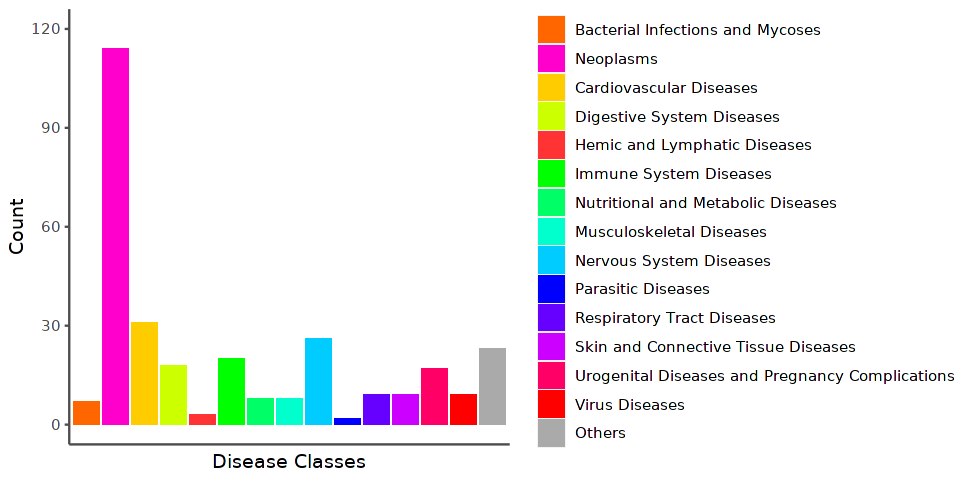

In [13]:
options(repr.plot.width=8, repr.plot.height=4)
f2a

In [23]:
ggsave("./f2a.pdf", f2a, height=100, width=175, units="mm", dpi=600)

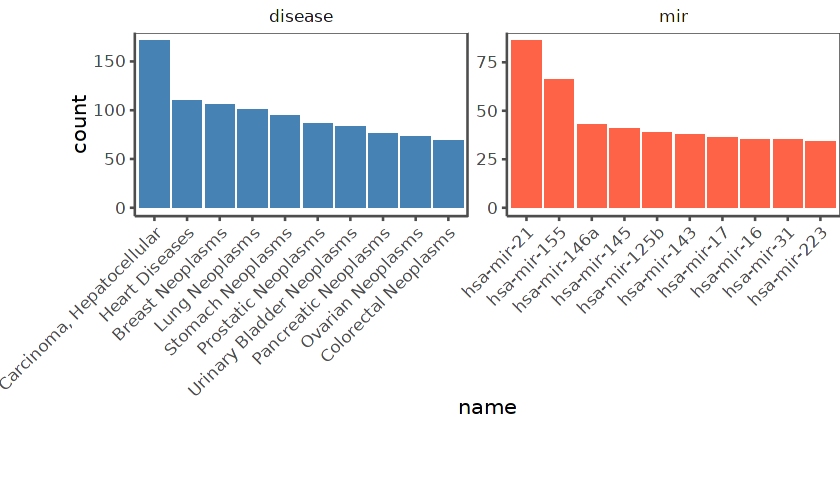

In [16]:
options(repr.plot.width=7, repr.plot.height=4)
f2bc

In [79]:
ggsave("./f2c.pdf", f2bc, height=100, width=100, units="mm", dpi=600)

# Figure 3

## code

In [ ]:
node.info <- read_tsv("./results/MRDN_nodes_property.txt")

In [ ]:
pnmod <- lm(Negative_Edge ~ Positive_Edge, node.info)
s <- summary(pnmod)
itc <- s$coefficients['(Intercept)', 'Estimate']
bx <- s$coefficients['Positive_Edge', 'Estimate']
lmfunc <- function (x){
    a <- as.numeric(x[4])
    b <- as.numeric(x[5])
    return(bx*a-b+itc)
}
node.info['distance'] <- apply(node.info, 1, lmfunc)

In [82]:
cor.test(node.info$Positive_Edge, node.info$Negative_Edge, method="pearson")


	Pearson's product-moment correlation

data:  node.info$Positive_Edge and node.info$Negative_Edge
t = 8.5259, df = 302, p-value = 7.385e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3450611 0.5268446
sample estimates:
      cor 
0.4404563 


In [ ]:
f3b <- ggplot(node.info, aes(Positive_Edge, Negative_Edge)) + 
    geom_point(aes(color=distance)) + 
    scale_color_gradient2(low="steelblue", high="tomato", midpoint=0, limits=c(-20, 20)) + 
    geom_smooth(method="lm") + 
    theme(panel.background = element_blank(), 
          panel.grid = element_blank(), 
          axis.line = element_line(color="gray30"), 
          axis.ticks = element_line(color="gray30"), 
          axis.text = element_text(color="gray30"),
         ) + 
    xlim(0,50) + 
    ylim(0,30) + 
    geom_text(data=head(arrange(node.info, distance)), 
              mapping=aes(x=Positive_Edge, y=Negative_Edge, label=Nodes), 
              size=2,
              position="jitter"
             ) + 
    #geom_text(data=head(arrange(node.info, desc(distance))),
    #          mapping=aes(x=Positive_Edge, y=Negative_Edge, label=Nodes), 
    #          size=2,
    #          position="jitter"
    #         ) 
    labs(x="Positive edge", y="Negative edge", color="Distance to\ntrend line")

In [ ]:
disf <- read_tsv("./results/MRDN_Distance.txt")
disf <- disf[disf$Distance!=0, ]
pst <- function(x){
    vec <- sort(as.vector(x))
    res <- paste(vec[1], vec[2], sep=".2.")
    return(res)
}
disf['pair'] <- as.vector(apply(disf[,c(1,2)], 1, pst))
disf <- disf[!duplicated(disf$pair), ]


In [172]:
res <- t.test(disf[["Distance"]][disf$Type=="intra"], disf[["Distance"]][disf$Type=="inter"])
res$p.value


	Welch Two Sample t-test

data:  disf[["Distance"]][disf$Type == "intra"] and disf[["Distance"]][disf$Type == "inter"]
t = -11.616, df = 11366, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.12486742 -0.08880933
sample estimates:
mean of x mean of y 
 2.474866  2.581704 


In [ ]:
disf['Type'] <- factor(disf$Type, ordered=TRUE, levels=c("intra", "inter"))
f3c <- ggplot(disf, aes(x=Type, y=Distance, color=Type, fill=Type)) + 
    geom_violin(scale="area", show.legend=FALSE) + 
    scale_y_continuous(breaks=seq(0,7,1), limits=c(0, 7)) + 
    scale_color_brewer(palette="Set1") +
    scale_fill_brewer(palette="Set1") + 
    theme(panel.background = element_blank(), 
          panel.grid = element_blank(), 
          axis.line = element_line(color="gray30"), 
          axis.ticks = element_line(color="gray30"), 
          axis.text = element_text(color="gray30")
         )

## plot

`geom_smooth()` using formula 'y ~ x'



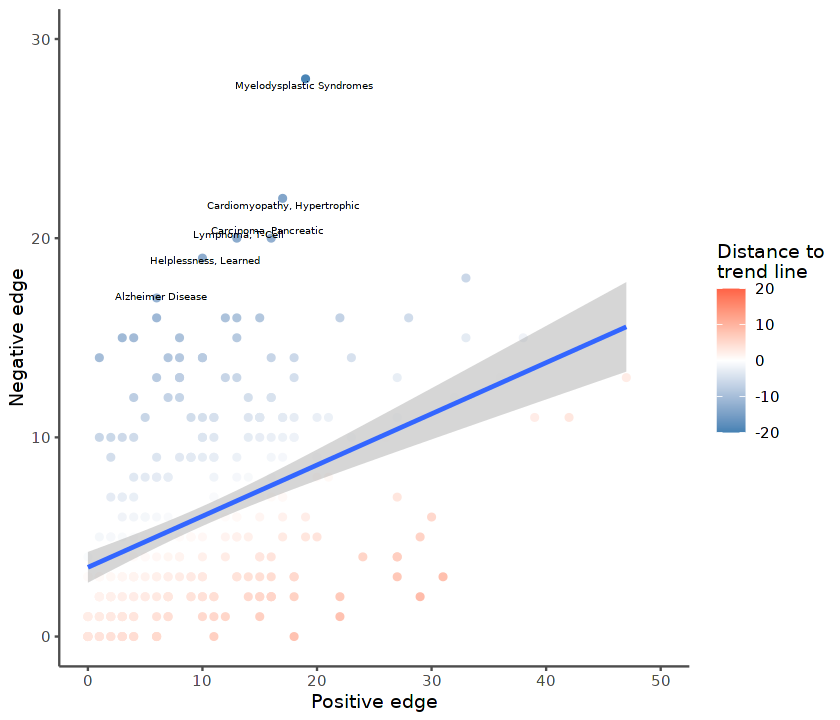

In [90]:
options(repr.plot.width=7, repr.plot.height=6)
f3b

In [92]:
ggsave("./f3b.pdf", height=80, width=170, units="mm", dpi=600)

`geom_smooth()` using formula 'y ~ x'



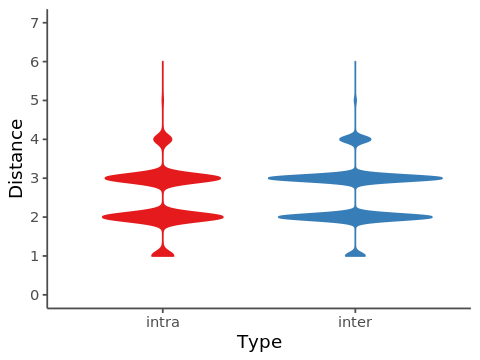

In [175]:
options(repr.plot.width=4, repr.plot.height=3)
f3c

# Fisher Test

In [177]:
disf <- read_tsv("./results/MRDN_diseases.txt")

Parsed with column specification:
cols(
  d1 = col_character(),
  d2 = col_character(),
  similarity = col_double(),
  d1_class = col_character(),
  d2_class = col_character(),
  same_class = col_logical()
)



In [188]:
disf <- disf %>%
    mutate(simabs=abs(similarity))
within_inter <- nrow(disf[(disf$simabs>0.05)&(!disf$same_class),])/2
within_intra <- nrow(disf[(disf$simabs>0.05)&(disf$same_class),])/2
without_inter <- nrow(disf[(disf$simabs<=0.05)&(!disf$same_class),])/2
without_intra <- nrow(disf[(disf$simabs<=0.05)&(disf$same_class),])/2
c(within_inter, within_intra, without_inter, without_intra)

[1]  1829   611 36075  7541

In [189]:
fisher.test(matrix(c(within_intra, within_inter, without_intra, without_inter), nrow=2, byrow=T))$p.value

[1] 1.015729e-20

In [191]:
disfi <- disf %>% filter(simabs > 0.05)
pa <- nrow(disfi[(disfi$similarity>0)&(disfi$same_class),])/2
pe <- nrow(disfi[(disfi$similarity>0)&(!disfi$same_class),])/2
na <- nrow(disfi[(disfi$similarity<0)&(disfi$same_class),])/2
ne <- nrow(disfi[(disfi$similarity<0)&(!disfi$same_class),])/2
c(pa, na, pe, ne)

[1]  432  179 1089  740

In [192]:
fisher.test(matrix(c(pa, pe, na, ne), nrow=2, byrow=TRUE))$p.value

[1] 6.590614e-07

# coherent

## code

In [211]:
coh_shuffle <- read.table("./results/coherent/MRDN_Coherent_Shuffle.txt", sep="\t", header=TRUE)
coh_shuffle['method'] <- "shuffle"
coh_rewiring <- read.table("./results/coherent/MRDN_Coherent_Rewiring.txt", sep="\t", header=TRUE)
coh_rewiring['method'] <- "rewiring"
coh <- rbind(coh_shuffle, coh_rewiring)

In [212]:
aggregate(coh[, c(1:3)], by=list(factor(coh$method)), FUN=mean)

Group.1,all,coherent,ratio
<fct>,<dbl>,<dbl>,<dbl>
rewiring,688.5768,349.4877,1.033769
shuffle,1537.5595,1378.3460,8.720209


In [213]:
t.test(x=coh_shuffle$ratio, mu=16.02)


	One Sample t-test

data:  coh_shuffle$ratio
t = -889.08, df = 9999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 16.02
95 percent confidence interval:
 8.704115 8.736303
sample estimates:
mean of x 
 8.720209 


In [214]:
cohp <- ggplot(coh, aes(x=ratio)) + 
    geom_smooth(stat="density", size=0.5) + 
    scale_x_continuous(limits=c(6,18), breaks=seq(6,18,2)) + 
    theme(panel.background = element_blank(), 
          panel.grid = element_blank(), 
          axis.line = element_line(color="gray30"), 
          axis.ticks = element_line(color="gray30"), 
          axis.text = element_text(color="gray30"),
         ) + 
    facet_wrap(. ~ method, scales="free") + 
    annotate("segment", x=16, xend=16, y=0.2, yend=0.05, arrow=arrow(length=unit(3,"mm")), size=0.6, color="firebrick3")


## plot

Warning message:
“Removed 10000 rows containing non-finite values (stat_density).”


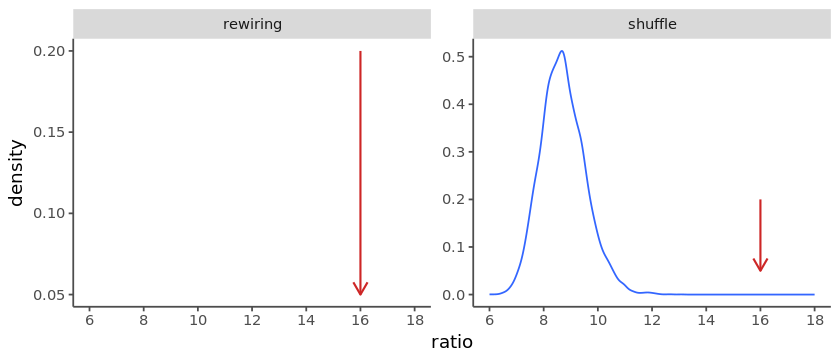

In [215]:
options(repr.plot.width=7, repr.plot.height=3)
cohp

# Figure 4

## code

In [93]:
mirmat <- read.table("./results/HMDD_similarity_matrix.txt", sep="\t", header=TRUE, row.names=1, check.names = FALSE, quote = "")

In [105]:
dname <- 'Aortic Aneurysm, Abdominal'
omat <- mirmat[order(mirmat[, dname]), c('Aortic Aneurysm, Abdominal', dname)]
vmat <- rbind(head(omat, 10), tail(omat, 11)[-11, ])
colnames(vmat) <- c("aaa", "disease")
vmat['xlab'] <- factor(rownames(vmat), ordered=TRUE, levels=rownames(vmat))
vmat['group'] <- factor(cut(vmat$disease, c(-1, 0, 1), labels=c("opposite", "similar")), 
                        ordered=TRUE, levels=c("similar", "opposite"))
simp <- ggplot(vmat, aes(x = xlab, y = disease, fill = group)) + 
  geom_col() + 
  scale_fill_manual(values=c("steelblue2", "firebrick1")) + 
  labs(x="Disease", y="Simiarity", title=dname) + 
  ylim(-0.2, 0.3) + 
  theme(panel.background = element_blank(), 
        panel.grid = element_blank(), 
        legend.position = "none", 
        axis.ticks.y = element_blank(), 
        axis.line.x = element_line(),
        plot.title = element_text(size=10)) + 
  coord_flip()

## plot

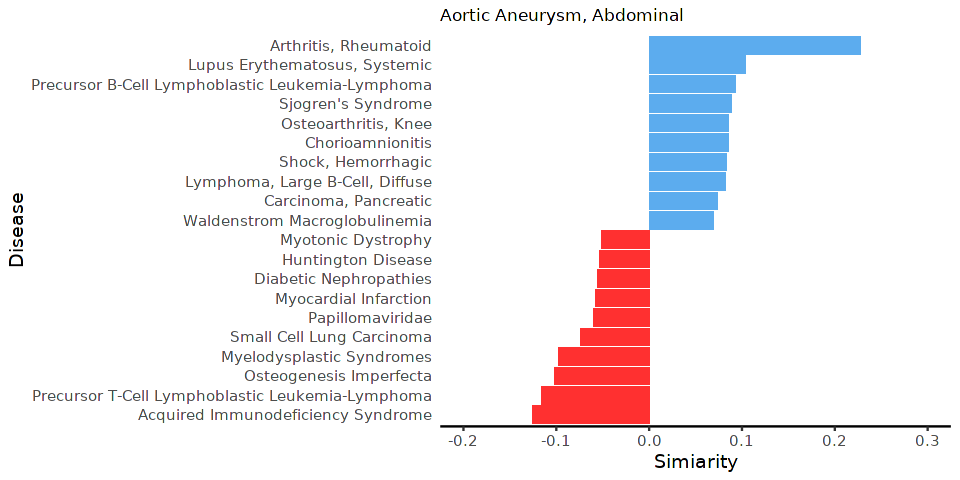

In [106]:
options(repr.plot.width=8, repr.plot.height=4)
simp

In [110]:
ggsave("./f4b.pdf", height=80, width=140, units="mm", dpi=600)

# Table S1

## code

In [ ]:
exp_data <- read_tsv("./results/HMDD_tissue.txt")
dcategory <- read_tsv("./results/MRDN_nodes_category.txt")
dcategory <- dcategory %>%
    rename(disease=Nodes)
exp_data <- exp_data %>%
    group_by(`pri-miRNA`, disease) %>%
    summarize(regulation=sum(regulation)) %>%
    filter(regulation != 0) %>%
    left_join(dcategory)
mir <- exp_data %>%
    group_by(`pri-miRNA`) %>%
    summarize(count=n()) %>%
    arrange(desc(count)) %>%
    head(n=10)
ts1 <- exp_data %>%
    group_by(`pri-miRNA`, Category) %>%
    summarize(count=n()) %>%
    filter((Category == "Neoplasms") | (Category == "Cardiovascular Diseases")) %>%
    spread(key=Category, value=count) %>%
    right_join(mir)

In [18]:
ts1

pri-miRNA,Cardiovascular Diseases,Neoplasms,count
<chr>,<int>,<int>,<int>
hsa-mir-125b,1,20,39
hsa-mir-143,1,21,38
hsa-mir-145,2,31,41
hsa-mir-146a,2,18,43
hsa-mir-155,6,33,66
hsa-mir-16,1,22,35
hsa-mir-17,1,28,36
hsa-mir-21,10,50,86
hsa-mir-223,5,17,34


# Response and Supplementary Materials

## Similar diseases of AAA

In [ ]:
# Similarity distribution
sim_matrix <- read_tsv("./results/HMDD_similarity_matrix.txt", 
                       col_type=cols(.default="d", disease="c"))

In [ ]:
sim_matrix_long <- sim_matrix %>%
    gather(d2, similarity, -disease) %>%
    filter(!disease==d2) %>%
    filter(!similarity==0) %>%
    mutate(disease_pair=sapply(1:n(), function(x){
        paste(sort(c(disease[x], d2[x])), collapse = ";")
    }), .before=1) %>%
    select(-disease, -d2) %>%
    distinct() %>%
    separate(disease_pair, into=c("disease1", "disease2"), sep=";")

In [ ]:
dist_sim <- sim_matrix_long %>%
    plotDensity("similarity") + 
    labs(title="")
#ggsave("./response/1_Distribution_of_disease_similarity.png", height=4, width=5, units="in", dpi=600)

In [ ]:
# Top and bottom similarity scores
top_sim <- sim_matrix_long %>%
    mutate(direction=ifelse(similarity>0, "similar", "opposite")) %>%
    arrange(desc(abs(similarity))) %>%
    group_by(direction) %>%
    slice(1:10) %>%
    arrange(desc(similarity))
write_xlsx(top_sim, "./response/1_Top_similarity.xlsx")

In [63]:
aaa <- "Aortic Aneurysm, Abdominal"
sim_matrix_long %>%
    filter(disease1==aaa|disease2==aaa) %>%
    filter(abs(similarity)>0.05) %>%
    arrange(desc(similarity))

disease1,disease2,similarity
<chr>,<chr>,<dbl>
"Aortic Aneurysm, Abdominal","Arthritis, Rheumatoid",0.22723675
"Aortic Aneurysm, Abdominal","Lupus Erythematosus, Systemic",0.10325398
"Aortic Aneurysm, Abdominal",Precursor B-Cell Lymphoblastic Leukemia-Lymphoma,0.09308278
"Aortic Aneurysm, Abdominal",Sjogren's Syndrome,0.08837866
"Aortic Aneurysm, Abdominal",Chorioamnionitis,0.08570278
"Aortic Aneurysm, Abdominal","Osteoarthritis, Knee",0.08570278
"Aortic Aneurysm, Abdominal","Shock, Hemorrhagic",0.08318286
"Aortic Aneurysm, Abdominal","Lymphoma, Large B-Cell, Diffuse",0.08258930
"Aortic Aneurysm, Abdominal","Carcinoma, Pancreatic",0.07338528


## Table S2

In [ ]:
weight_matrix <- read_tsv("./results/HMDD_weight_matrix.txt", 
                          col_type=cols(.default="d", disease="c"))

In [ ]:
weight_matrix_long <- weight_matrix %>%
    gather(miRNA, weight, -disease) %>%
    filter(weight!=0) 

In [ ]:
dist_weight <- weight_matrix_long %>%
    plotDensity("weight") + 
    scale_x_continuous(breaks=seq(-25, 50, by=10)) + 
    labs(title="", x="Weights")
#ggsave("./response/1_Distribution_of_miRNA_Weights.png", height=4, width=5, units="in", dpi=600)

In [ ]:
# Top and bottom miRNA disease scores
top_weight <- weight_matrix_long %>%
    mutate(direction=ifelse(weight>0, "upregulated", "downregulated")) %>%
    arrange(desc(abs(weight))) %>%
    group_by(direction) %>%
    slice(1:10) %>%
    arrange(desc(weight))
write_xlsx(top_weight, "./response/1_Top_weights.xlsx")

In [ ]:
weight_matrix_long %>%
    mutate(direction=ifelse(weight>0, "upregulated", "downregulated")) %>%
    filter(disease=="Aortic Aneurysm, Abdominal") %>%
    write_xlsx("./response/1_AAA_miRNA_weights.xlsx")

In [ ]:
# All miRNA disease scores
all_weight <- weight_matrix_long %>%
    mutate(direction=ifelse(weight>0, "upregulated", "downregulated")) %>%
    arrange(desc(abs(weight))) %>%
    group_by(direction) %>%
    arrange(desc(weight))
write_xlsx(all_weight, "./response/1_All_weights.xlsx")

## Figure S2

In [ ]:
nodes <- read_tsv("./results/MRDN_nodes_property.txt")
edges <- read_tsv("./results/MRDN_edges.txt")

In [ ]:
fields <- c("Degree", "Positive_Edge", "Negative_Edge", "Cluster_Coefficient")
pl <- lapply(fields, function(x){
    nodes %>%
    plotDensity(x) + 
    labs(title="", x=str_replace(x, "_", " "))
})

In [ ]:
pl$dist_weight <- dist_weight
pl$dist_sim <- dist_sim

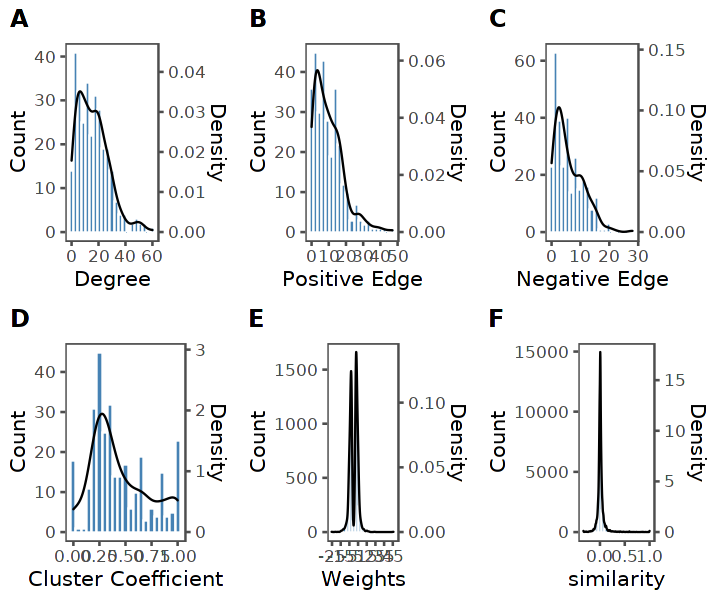

In [277]:
ggpubr::ggarrange(plotlist = pl, ncol=3, nrow=2, labels=c("A", "B", "C", "D", "E", "F"))
ggsave("./response/suppfig_2.png", height=5, width=9, units="in", dpi=600)

## Table S4

In [ ]:
nodes <- read_tsv("./results/MRDN_nodes_property.txt")
edges <- read_tsv("./results/MRDN_edges.txt")

In [ ]:
neighbors <- lapply(nodes$Nodes, function(x){
    neighbor_edges <- edges %>%
        filter(Disease1==x|Disease2==x)
    tibble(Node=x, Neighbor=setdiff(unique(c(neighbor_edges$Disease1, neighbor_edges$Disease2)), x)) %>%
        left_join(rename(nodes[, 1:2], Node=Nodes), by="Node") %>%
        left_join(rename(nodes[, 1:2], Neighbor=Nodes, Neighbor_Cate=Category), by="Neighbor")
}) %>% bind_rows()

In [ ]:
get_most_cate <- function(x){
    tmp <- tibble(x=x) %>%
        group_by(x) %>%
        summarise(n=n(), .groups="drop") %>%
        filter(n==max(n))
    tmp
}

In [ ]:
getEntropy <- function(x){
    p <- rle(sort(x))$length/length(x)
    ent <- -sum(p*log2(p))
    return(ent)
}

In [ ]:
neighbor_info <- neighbors %>%
    group_by(Node) %>%
    summarise(same_cate_neighbor=sum(Category==Neighbor_Cate), 
              entropy=getEntropy(Neighbor_Cate), 
              top_cate_neighbor=get_most_cate(Neighbor_Cate)$x, 
              top_cate_number=get_most_cate(Neighbor_Cate)$n, 
              .groups="drop") %>%
    arrange(desc(same_cate_neighbor)) %>%
    left_join(nodes %>% rename(Node=Nodes), by="Node")

In [ ]:
neighbor_info %>%
    select(Node, Category, Degree, same_cate_neighbor, top_cate_neighbor, top_cate_number) %>%
    rename(Neighbors_from_same_category = same_cate_neighbor, 
           Top_category_of_neighbors = top_cate_neighbor, 
           Neighbors_from_top_category = top_cate_number) %>%
    write_xlsx("./response/2_5_Neighbor_Categories.xlsx")

In [ ]:
neighbor_info %>%
    filter(top_cate_neighbor != Category) %>%
    #filter(top_cate_neighbor=="Neoplasms") %>%
    filter(Category=="Cardiovascular Diseases") %>%
    arrange(desc(top_cate_number)) %>%
    select(Node, Category, Degree, same_cate_neighbor, top_cate_neighbor, top_cate_number) %>%
    rename(Neighbors_from_same_category = same_cate_neighbor, 
           Top_category_of_neighbors = top_cate_neighbor, 
           Neighbors_from_top_category = top_cate_number) %>%
    write_xlsx("./response/2_5_Neighbor_Categories_cardiac.xlsx")

In [ ]:
neighbor_info %>%
    filter(top_cate_neighbor != Category) %>%
    filter(top_cate_neighbor!="Neoplasms") %>%
    arrange(desc(top_cate_number))

## Figure S3 Permutation test

In [ ]:
library("igraph")

getImmNeibor <- function(g){
    aaa_index <- which(V(g)$name=="Aortic Aneurysm, Abdominal")
    ends(g, E(g)[from(aaa_index)]) %>%
        apply(1, paste0, collapse="") %>%
        str_replace("Aortic Aneurysm, Abdominal", "") %>%
        tibble() %>% setNames(c("Nodes")) %>%
        left_join(nodes[, 1:2], by="Nodes") %>%
        filter(Category=="Immune System Diseases") %>%
        nrow()
}

In [ ]:
g <- graph_from_data_frame(edges, directed=F)

In [ ]:
getImmNeibor(g)

In [ ]:
perm_imm <- sapply(1:10000, function(x){
    g1 <- rewire(g, keeping_degseq(niter=vcount(g)*10))
    return(getImmNeibor(g1))
})

In [445]:
t.test(perm_imm[1:10000], mu=7)


	One Sample t-test

data:  perm_imm[1:10000]
t = -262.53, df = 9999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 7
95 percent confidence interval:
 3.114907 3.172493
sample estimates:
mean of x 
   3.1437 


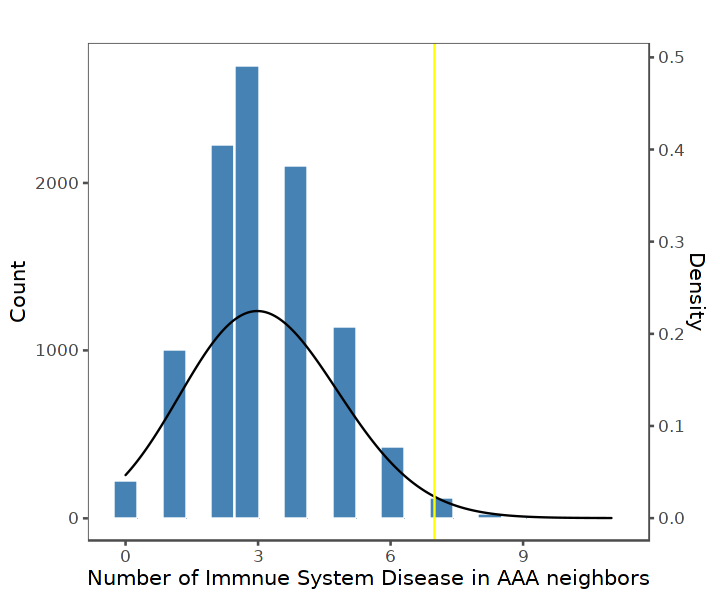

In [430]:
tibble(perm=perm_imm) %>%
    plotDensity("perm", bw=1) +
    geom_vline(xintercept=7, color="yellow") + 
    labs(title="", x="Number of Immnue System Disease in AAA neighbors")
ggsave("./response/perm.pdf", height=4, width=5, units="in", dpi=600)


## AAA related miRNAs

In [225]:
aaa_mirna <- weight_matrix_long %>%
    filter(disease=="Aortic Aneurysm, Abdominal") %>%
    select(miRNA) %>% deframe()

In [230]:
aaa_mirna

[1] "hsa-mir-124a" "hsa-mir-126"  "hsa-mir-146a" "hsa-mir-155"  "hsa-mir-223" 
[6] "hsa-mir-29b"

In [282]:
weight_matrix_long %>%
    filter(miRNA %in% aaa_mirna) %>%
    select(disease) %>%
    distinct() %>%
    left_join(nodes %>% rename(disease=Nodes), by="disease") %>%
    group_by(Category) %>%
    summarise(n=n()) %>%
    arrange(desc(n))

`summarise()` ungrouping output (override with `.groups` argument)



Category,n
<chr>,<int>
Neoplasms,48
Immune System Diseases,12
Nervous System Diseases,11
Cardiovascular Diseases,9
Others,6
Skin and Connective Tissue Diseases,6
Digestive System Diseases,4
Urogenital Diseases and Pregnancy Complications,4
Bacterial Infections and Mycoses,3
